In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv("dataset.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [4]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,303.0,54.366337,9.082101,29.0,47.5,55.0,61.0,77.0
sex,303.0,0.683168,0.466011,0.0,0.0,1.0,1.0,1.0
cp,303.0,0.966997,1.032052,0.0,0.0,1.0,2.0,3.0
trestbps,303.0,131.623762,17.538143,94.0,120.0,130.0,140.0,200.0
chol,303.0,246.264026,51.830751,126.0,211.0,240.0,274.5,564.0
fbs,303.0,0.148515,0.356198,0.0,0.0,0.0,0.0,1.0
restecg,303.0,0.528053,0.525860,0.0,0.0,1.0,1.0,2.0
thalach,303.0,149.646865,22.905161,71.0,133.5,153.0,166.0,202.0
exang,303.0,0.326733,0.469794,0.0,0.0,0.0,1.0,1.0
oldpeak,303.0,1.039604,1.161075,0.0,0.0,0.8,1.6,6.2


In [6]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


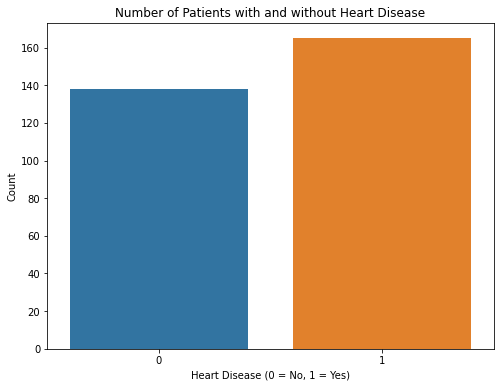

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='target', data=df)
plt.title('Number of Patients with and without Heart Disease')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()


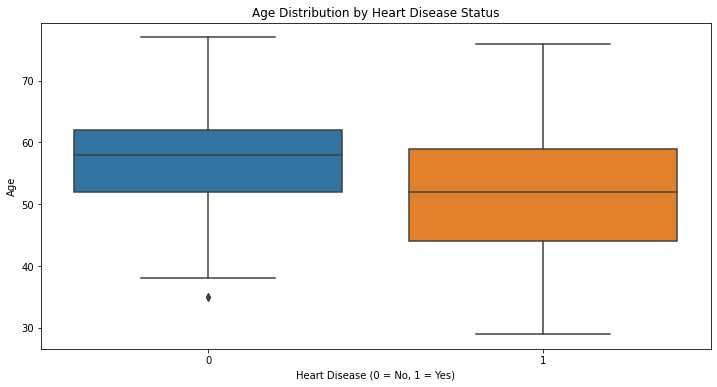

In [8]:
# Box plot for age and target variable
plt.figure(figsize=(12, 6))
sns.boxplot(x='target', y='age', data=df)
plt.title('Age Distribution by Heart Disease Status')
plt.xlabel('Heart Disease (0 = No, 1 = Yes)')
plt.ylabel('Age')
plt.show()


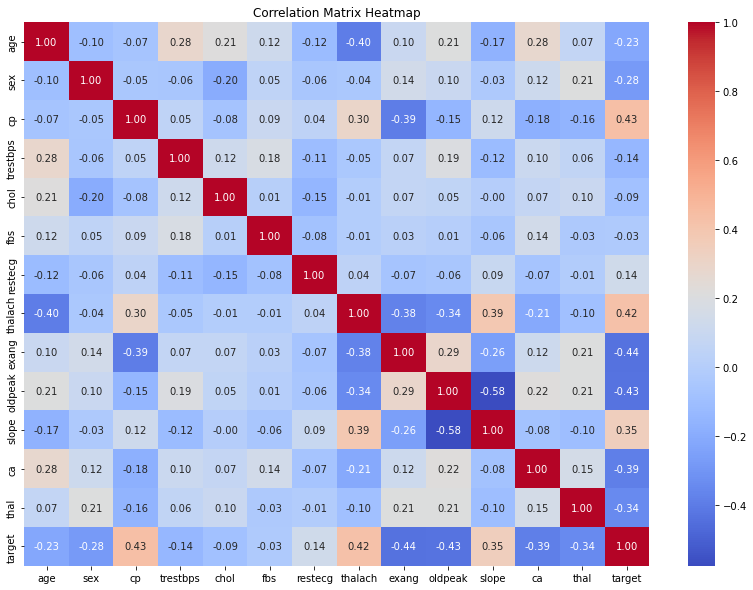

In [9]:
# Heatmap for correlation matrix
correlation_matrix = df.corr()
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


# Model Building

In [10]:
X = df.drop('target', axis=1)
y = df['target']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 1. Logistic Regression

In [12]:
# Initialize and train the logistic regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred_log_reg = log_reg.predict(X_test)

In [13]:
# Confusion matrix and accuracy
conf_matrix_log_reg = confusion_matrix(y_test, y_pred_log_reg)
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
print('Confusion Matrix:\n', conf_matrix_log_reg)
print('Accuracy:', accuracy_log_reg)


Confusion Matrix:
 [[32  9]
 [ 8 42]]
Accuracy: 0.8131868131868132


# 2. Decision Tree

In [14]:
# Initialize and train the decision tree model
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Predict on the test set
y_pred_dtree = dtree.predict(X_test)


In [15]:
# Confusion matrix and accuracy
conf_matrix_dtree = confusion_matrix(y_test, y_pred_dtree)
accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print('Confusion Matrix:\n', conf_matrix_dtree)
print('Accuracy:', accuracy_dtree)


Confusion Matrix:
 [[32  9]
 [15 35]]
Accuracy: 0.7362637362637363


In [16]:
# Export the tree as a dot file
dot_data = export_graphviz(dtree, out_file=None, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True, special_characters=True)

# Visualize the tree
graph = graphviz.Source(dot_data)
graph.render("decision_tree")  # Saves the tree as a .pdf file
graph.view()


'decision_tree.pdf'

# 3. Random Forest

In [17]:
# Initialize and train the random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred_rf = rf.predict(X_test)


In [18]:
# Confusion matrix and accuracy
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print('Confusion Matrix:\n', conf_matrix_rf)
print('Accuracy:', accuracy_rf)


Confusion Matrix:
 [[33  8]
 [ 8 42]]
Accuracy: 0.8241758241758241


In [19]:
# Export the first tree of the forest as a dot file
estimator = rf.estimators_[0]
dot_data_rf = export_graphviz(estimator, out_file=None, feature_names=X.columns, class_names=['No Disease', 'Disease'], filled=True, rounded=True, special_characters=True)

# Visualize the tree
graph_rf = graphviz.Source(dot_data_rf)
graph_rf.render("random_forest_tree")  # Saves the tree as a .pdf file
graph_rf.view()


'random_forest_tree.pdf'

# Select the best model

In [20]:
print('Logistic Regression Confusion Matrix:\n', conf_matrix_log_reg)
print('Decision Tree Confusion Matrix:\n', conf_matrix_dtree)
print('Random Forest Confusion Matrix:\n', conf_matrix_rf)


Logistic Regression Confusion Matrix:
 [[32  9]
 [ 8 42]]
Decision Tree Confusion Matrix:
 [[32  9]
 [15 35]]
Random Forest Confusion Matrix:
 [[33  8]
 [ 8 42]]


In [21]:
report_log_reg = classification_report(y_test, y_pred_log_reg)
report_dtree = classification_report(y_test, y_pred_dtree)
report_rf = classification_report(y_test, y_pred_rf)
print('Logistic Regression Classification Report:\n', report_log_reg)
print('Decision Tree Classification Report:\n', report_dtree)
print('Random Forest Classification Report:\n', report_rf)


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79        41
           1       0.82      0.84      0.83        50

    accuracy                           0.81        91
   macro avg       0.81      0.81      0.81        91
weighted avg       0.81      0.81      0.81        91

Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.68      0.78      0.73        41
           1       0.80      0.70      0.74        50

    accuracy                           0.74        91
   macro avg       0.74      0.74      0.74        91
weighted avg       0.74      0.74      0.74        91

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro

In [22]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Logistic Regression scores
precision_log_reg = precision_score(y_test, y_pred_log_reg)
recall_log_reg = recall_score(y_test, y_pred_log_reg)
f1_log_reg = f1_score(y_test, y_pred_log_reg)

# Decision Tree scores
precision_dtree = precision_score(y_test, y_pred_dtree)
recall_dtree = recall_score(y_test, y_pred_dtree)
f1_dtree = f1_score(y_test, y_pred_dtree)

# Random Forest scores
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print(f'Logistic Regression - Precision: {precision_log_reg}, Recall: {recall_log_reg}, F1 Score: {f1_log_reg}')
print(f'Decision Tree - Precision: {precision_dtree}, Recall: {recall_dtree}, F1 Score: {f1_dtree}')
print(f'Random Forest - Precision: {precision_rf}, Recall: {recall_rf}, F1 Score: {f1_rf}')


Logistic Regression - Precision: 0.8235294117647058, Recall: 0.84, F1 Score: 0.8316831683168315
Decision Tree - Precision: 0.7954545454545454, Recall: 0.7, F1 Score: 0.7446808510638298
Random Forest - Precision: 0.84, Recall: 0.84, F1 Score: 0.8399999999999999


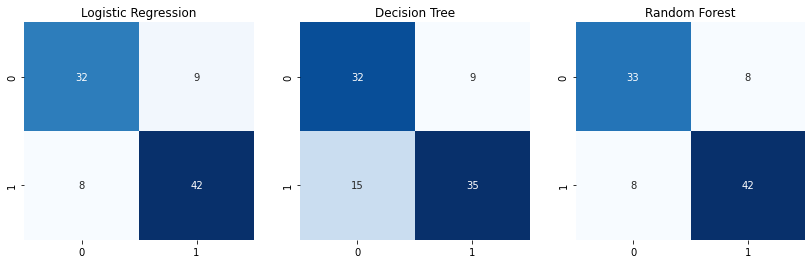

In [23]:
plt.figure(figsize=(14, 4))

# Logistic Regression Confusion Matrix
plt.subplot(1, 3, 1)
sns.heatmap(conf_matrix_log_reg, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Logistic Regression')

# Decision Tree Confusion Matrix
plt.subplot(1, 3, 2)
sns.heatmap(conf_matrix_dtree, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Decision Tree')

# Random Forest Confusion Matrix
plt.subplot(1, 3, 3)
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Random Forest')

plt.show()


In [24]:
# Compare the accuracies
print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print(f'Decision Tree Accuracy: {accuracy_dtree}')
print(f'Random Forest Accuracy: {accuracy_rf}')

# Determine the best model
best_model = max((accuracy_log_reg, 'Logistic Regression'), (accuracy_dtree, 'Decision Tree'), (accuracy_rf, 'Random Forest'))
print(f'The best model is {best_model[1]} with an accuracy of {best_model[0]:.4f}')


Logistic Regression Accuracy: 0.8131868131868132
Decision Tree Accuracy: 0.7362637362637363
Random Forest Accuracy: 0.8241758241758241
The best model is Random Forest with an accuracy of 0.8242
